# Selecting Logan Search results by Sequencing Technology using Python in Jupyter

This notebook demonstrates how you could filter Logan Search Results by technolgy.

This assumes you have worked through [Working with with Logan Search results in Jupyter](Working_with_Logan_Search_results_with_Python_in_Jupyter.ipynb). If you haven't yet, please do that first.   
Indeed the first code cell below is directly from the first cell [there](Working_with_Logan_Search_results_with_Python_in_Jupyter.ipynb).


----------

#### Reading in the results for several queries

Run the code in the next cell assigning the settings to match the set-up preparation performed and to bring in the results data to the active namespace:


In [1]:
results_dir = "/home/jovyan/logan_search_results/"
consistent_part_of_file_name_suffix = "_31mer_"

import os
import fnmatch
import pandas as pd

def extract_tags_from_filename(filename):
    '''
    extract tag labels from file names

    return the tag label
    '''
    first_part = filename.split(consistent_part_of_file_name_suffix,1)[0]
    all_but_first_part_of_remainder_as_list = first_part.split("_")[1:]
    return "_".join(all_but_first_part_of_remainder_as_list)
    
matched_filenames = []
file_tags_per_file = []
dfs = []
for file in os.listdir(results_dir):
    if fnmatch.fnmatch(file, '*.tsv'):
        matched_filenames.append(file)
        file_tags_per_file.append(extract_tags_from_filename(file))
        dfs.append(pd.read_csv(results_dir + file, sep="\t"))

# provide feedback about what was read in
max_filename_length = max(len(filename) for filename in matched_filenames)
for filename, df in zip(matched_filenames, dfs): 
    print(f'from {filename}:{" " * (max_filename_length - len(filename))} {len(df):>6} rows read in')

#print(file_tags_per_file) # FOR DEBUGGING, uncomment
#print(matched_filenames) # FOR DEBUGGING, uncomment
gene_name = file_tags_per_file[0].split("_",1)[0]
# make tuples of tag labels and corresponding dataframes
tags_and_dataframes = list(zip(file_tags_per_file, dfs)) # tags are first in each two-item tuple, the dataframe is second
# make dictionary of tuples of tag labels and corresponding dataframes, integers will be the keys with the tuples as values
tags_and_dataframes_dict = dict(zip(range(len(file_tags_per_file)), zip(file_tags_per_file, dfs))) # integers ('index') are keys with tags are first in each two-item tuple, the dataframe is second
print(f"\nTOTAL QUERY RESULTS READ IN: {len(file_tags_per_file)}")

from human_USP7_TSL4_altSJ_31mer_logan_results.tsv:  19997 rows read in
from human_USP7_TSL4_SJ_31mer_logan_results.tsv:     19998 rows read in
from human_USP7_SJ_14n15_31mer_logan_results.tsv:    19999 rows read in
from human_USP7_SJ_34_31mer_logan_results.tsv:       19997 rows read in

TOTAL QUERY RESULTS READ IN: 4


--------

## Selecting based on Sequencing Technology

#### Step #1 add a type column based on Instrument used

In step #1, we'll add and additional column to the data based on the `Instruments` column.  
To do that first we have to bring in a table that has the technology instruments.  
Run the cell below to read the the comma-separated values file (.csv) that contains the details on the instruments that are seen in the results from Logan Search results:

In [2]:
import pandas as pd
instr_dets_df = pd.read_csv("supporting_tables/sequencing_instrument_details_for_all_SRA_options_seen_thus_far.csv")
instrument_to_type_dict = dict(zip(instr_dets_df['Instrument'],instr_dets_df['Read Type']))
#instr_dets_df.head() #Uncomment this line to display the first five lines of the dataframe made from `.csv` file

Now we are ready to do the assignment step.

The following cell should add a column 'reads_type' based on the `instr_dets` dataframe.

In [3]:
for df in dfs:
    #df['Read Type'] = df['instrument'].apply(instrument_to_type)
    df['reads_type'] = df['instrument'].map(instrument_to_type_dict)

If you later edit this notebook to repeat it with your own results, keep in mind tha assignment step may fail. Whike an effort was made to make it fairly extensive, the table may not be complete at this time. If you see an error here it may be that there is no match for an instrument listed in your results among the list supplied here. To fix it though, you should be able to edit the comma-separated values file [there](supporting_tables/sequencing_instrument_details_for_all_SRA_options_seen_thus_far.csv), save it, and run the code again.

Let's run the following code to see that a new 'reads_type' column has been added to the first dataframe:

Now with that column added, we can use it to subset a dataframe in whcih we are interested.

#### Step #2 Select on the technology type

We'll filter the human results for 'alt_SJ' based on if the sequencing reads type is '`Long`'. 

In [4]:
alt_SJ_df = tags_and_dataframes_dict[0][1]
human_altsjdf = alt_SJ_df.query("organism == 'Homo sapiens'")
print(f"There's {len(human_altsjdf)} human datasets in the 'alt_SJ' results.")
human_long_reads_for_alt_SJ_df = human_altsjdf.query("reads_type == 'Long'")
print(f"Out of those {len(human_altsjdf)}, there's {len(human_long_reads_for_alt_SJ_df)} 'long-read' ones.")
human_long_reads_for_alt_SJ_df

There's 9096 human datasets in the 'alt_SJ' results.
Out of those 9096, there's 8 'long-read' ones.


,ID,kmer_coverage,bioproject,biosample,bioproject_title,bioproject_description,sample_acc,assay_type,center_name,experiment,...,avgspotlen,mbases,biosamplemodel_sam,collection_date_sam,location_count,location_avg_coverage,location_max_coverage,location_min_coverage,location_med_coverage,reads_type
350,SRR14212343,1,PRJNA721322,SAMN18714204,RNA-Seq analysis (long-reads) of human parenta...,M238P BRAFV600E mutant melanoma cells sensitiv...,SRS8683487,ncRNA-Seq,GEO,SRX10578990,...,698,11980,NaN,NaN,0,NaN,NaN,NaN,NaN,Long
1303,SRR22729431,1,PRJNA912090,SAMN32218795,Exploring collateral RNA cleavage by LbuCas13a...,LbuCas13a exhibits widespread collateral RNA c...,SRS16133703,FL-cDNA,LUMC,SRX18690947,...,382,537,Human,NaN,0,NaN,NaN,NaN,NaN,Long
1484,SRR13781371,1,PRJNA704727,SAMN18053880,Respiratory syncytial virus induces alternativ...,we examine the effect of RSV infection in huma...,SRS8317380,RNA-Seq,GEO,SRX10166867,...,1508,33362,NaN,NaN,0,NaN,NaN,NaN,NaN,Long
3086,ERR5670887,1,PRJEB42052,SAMEA8515329,Targeting the m6A RNA modification pathway blo...,N6-methyladenosine (m6A) is an abundant intern...,ERS6200127,OTHER,NEW YORK UNIVERSITY SCHOOL OF MEDICINE,ERX5386380,...,1669,753,NaN,NaN,43,1.0,1.0,1.0,1.0,Long
3730,SRR13781369,1,PRJNA704727,SAMN18053882,Respiratory syncytial virus induces alternativ...,we examine the effect of RSV infection in huma...,SRS8317378,RNA-Seq,GEO,SRX10166865,...,1481,27528,NaN,NaN,0,NaN,NaN,NaN,NaN,Long
7840,DRR240810,1,PRJDB10404,SAMD00239194,Suberoyl bis-hydroxamic acid induced KSHV reac...,"Suberoyl bis-hydroxamic acid (SBHA), a histone...",DRS164859,FL-cDNA,NIID,DRX230669,...,1042,655,NaN,NaN,0,NaN,NaN,NaN,NaN,Long
15801,SRR22253895,1,PRJNA900202,SAMN31682143,Functional and molecular dissection of viral l...,"Small, compact genomes confer a selective adva...",SRS15726532,RNA-Seq,"NARRY KIM LAB, CENTER FOR RNA RESEARCH, INSTIT...",SRX18230429,...,1286,1263,NaN,NaN,0,NaN,NaN,NaN,NaN,Long
19713,SRR13781372,1,PRJNA704727,SAMN18053879,Respiratory syncytial virus induces alternativ...,we examine the effect of RSV infection in huma...,SRS8317381,RNA-Seq,GEO,SRX10166868,...,1318,39991,NaN,NaN,0,NaN,NaN,NaN,NaN,Long


We see eight datasets have 'Long' for the reads type.

The produced dataframe could be used to consider possibe datasets to investigate further.

For example, you may prefer a BioProject / BioSample set that had both long and short reads.
Looking at one BioProject identified among the eight with long reads, we can see that is the case for BioProject `PRJEB42052`.

In [5]:
alt_SJ_df.query("bioproject == 'PRJEB42052'")

,ID,kmer_coverage,bioproject,biosample,bioproject_title,bioproject_description,sample_acc,assay_type,center_name,experiment,...,avgspotlen,mbases,biosamplemodel_sam,collection_date_sam,location_count,location_avg_coverage,location_max_coverage,location_min_coverage,location_med_coverage,reads_type
385,ERR5654683,1,PRJEB42052,SAMEA8492555,Targeting the m6A RNA modification pathway blo...,N6-methyladenosine (m6A) is an abundant intern...,ERS6177360,RIP-Seq,NEW YORK UNIVERSITY SCHOOL OF MEDICINE,ERX5370174,...,102,3795,NaN,NaN,43,1.0,1.0,1.0,1.0,Short
3086,ERR5670887,1,PRJEB42052,SAMEA8515329,Targeting the m6A RNA modification pathway blo...,N6-methyladenosine (m6A) is an abundant intern...,ERS6200127,OTHER,NEW YORK UNIVERSITY SCHOOL OF MEDICINE,ERX5386380,...,1669,753,NaN,NaN,43,1.0,1.0,1.0,1.0,Long
3863,ERR5654602,1,PRJEB42052,SAMEA8492555,Targeting the m6A RNA modification pathway blo...,N6-methyladenosine (m6A) is an abundant intern...,ERS6177360,RIP-Seq,NEW YORK UNIVERSITY SCHOOL OF MEDICINE,ERX5370093,...,102,4018,NaN,NaN,43,1.0,1.0,1.0,1.0,Short
5002,ERR5654698,1,PRJEB42052,SAMEA8492553,Targeting the m6A RNA modification pathway blo...,N6-methyladenosine (m6A) is an abundant intern...,ERS6177358,RIP-Seq,NEW YORK UNIVERSITY SCHOOL OF MEDICINE,ERX5370189,...,102,3978,NaN,NaN,43,1.0,1.0,1.0,1.0,Short
5881,ERR5654700,1,PRJEB42052,SAMEA8492553,Targeting the m6A RNA modification pathway blo...,N6-methyladenosine (m6A) is an abundant intern...,ERS6177358,RIP-Seq,NEW YORK UNIVERSITY SCHOOL OF MEDICINE,ERX5370191,...,102,4529,NaN,NaN,43,1.0,1.0,1.0,1.0,Short
6942,ERR5654687,1,PRJEB42052,SAMEA8492555,Targeting the m6A RNA modification pathway blo...,N6-methyladenosine (m6A) is an abundant intern...,ERS6177360,RIP-Seq,NEW YORK UNIVERSITY SCHOOL OF MEDICINE,ERX5370178,...,102,7816,NaN,NaN,43,1.0,1.0,1.0,1.0,Short
11017,ERR5654690,1,PRJEB42052,SAMEA8492553,Targeting the m6A RNA modification pathway blo...,N6-methyladenosine (m6A) is an abundant intern...,ERS6177358,RIP-Seq,NEW YORK UNIVERSITY SCHOOL OF MEDICINE,ERX5370181,...,102,4513,NaN,NaN,43,1.0,1.0,1.0,1.0,Short
13938,ERR5654686,1,PRJEB42052,SAMEA8492555,Targeting the m6A RNA modification pathway blo...,N6-methyladenosine (m6A) is an abundant intern...,ERS6177360,RIP-Seq,NEW YORK UNIVERSITY SCHOOL OF MEDICINE,ERX5370177,...,102,5974,NaN,NaN,43,1.0,1.0,1.0,1.0,Short
16769,ERR5654685,1,PRJEB42052,SAMEA8492553,Targeting the m6A RNA modification pathway blo...,N6-methyladenosine (m6A) is an abundant intern...,ERS6177358,RIP-Seq,NEW YORK UNIVERSITY SCHOOL OF MEDICINE,ERX5370176,...,102,3957,NaN,NaN,43,1.0,1.0,1.0,1.0,Short


------

You may note that the results of `alt_SJ_df.query("bioproject == 'PRJEB42052'")` shows two BioSamples.

The same BioProject being attached to several datasets points out that although I have been referring to them as 'datasets' that may make them see largely independent, many of them are related.

We can show that for the first dataframe:

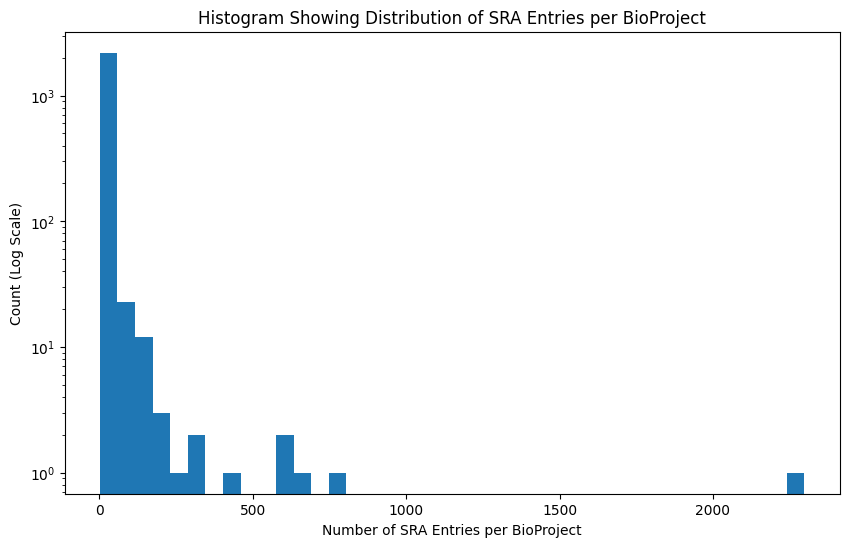

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

df = alt_SJ_df

# Calculate SRA entries per BioProject
bioproject_counts = df['bioproject'].value_counts()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'bioproject_counts': bioproject_counts.values})

#print("Data Distribution:")
#print(plot_data['bioproject_counts'].describe())

plt.figure(figsize=(10, 6))
plt.hist(plot_data['bioproject_counts'], bins=40, log=True)
plt.title('Matplotlib log=True')
plt.title('Histogram Showing Distribution of SRA Entries per BioProject')
plt.xlabel('Number of SRA Entries per BioProject')
plt.ylabel('Count (Log Scale)')
plt.show()

While there is a definite skew with a lot of BioProjects having a low count of datasets represented in the results, there's several that are represented dozens and several dozens of times. Plus, there's even a few high-count ones that number in the hundreds of representatives among the results, and one occurs 2298 times. You can examine `bioproject_counts[:50]` yourself to get a better sense.

(Note that `bioproject_counts.sum()` doesn't add up to the total rows in the dataframe because fifteen are `NaN` that you see by running `df[~df['bioproject'].str.startswith('PR', na=False)]` because all the typical ones begin with the letters `PR`. So you may want to be careful restricting on the BioProject value.)

So a lot of the 'datasets' referenced earlier in this series are indeed related to the same project.

This holds for BioSamples, too....

-----

Enjoy!